# Facial Landmark Detection

In this notebook I am going to use the Dlib library to detect 68 points of interest on a face. The landmark detector (which was created by Github user italojs) can be found here: https://github.com/italojs/facial-landmarks-recognition-/blob/master/shape_predictor_68_face_landmarks.dat

In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import dlib
from imutils import face_utils
from matplotlib import pyplot as plt

An image from the KDEF dataset will be used.

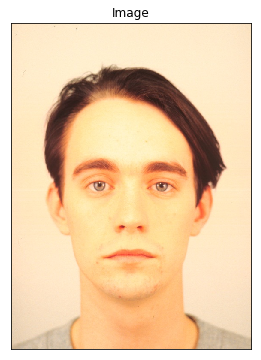

In [2]:
image = cv.imread('AM24NES.JPG')
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(image2)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

A 3x3 Gaussian filter will be applied to the image.

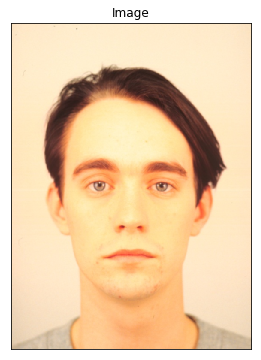

In [3]:
image = cv.GaussianBlur(image, (3,3), 0)
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(image2)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

Now Contrast Adaptive Histogram Equalization will be applied to the image.

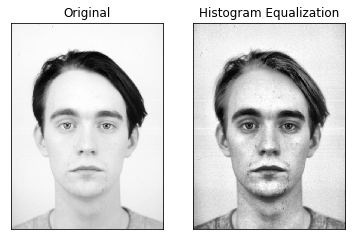

In [4]:
image2 = cv.cvtColor(image2, cv.COLOR_RGB2GRAY)
clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(8,8))
cl1 = clahe.apply(image2.copy())

plt.figure(figsize=(6,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cl1, cmap='gray'),plt.title('Histogram Equalization')
plt.xticks([]), plt.yticks([])
plt.show()

Now the landmark detector will be stored

In [5]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

Now the faces and 68 landmarks on the face will be detected.

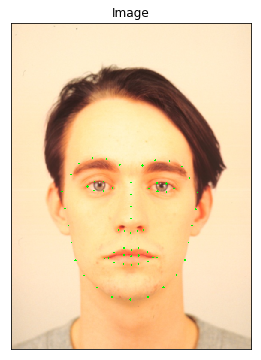

In [6]:
# detect faces in the grayscale image
rects = detector(cl1, 0)
    
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(cl1, rect)
    shape = face_utils.shape_to_np(shape)
    
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
        cv.circle(image, (x, y), 2, (0, 255, 0), -1)
image2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(image2)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()